In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from coffea.hist import plot
import coffea.hist as hist

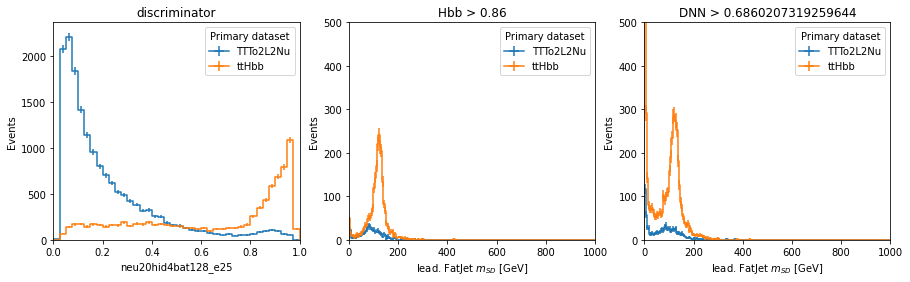

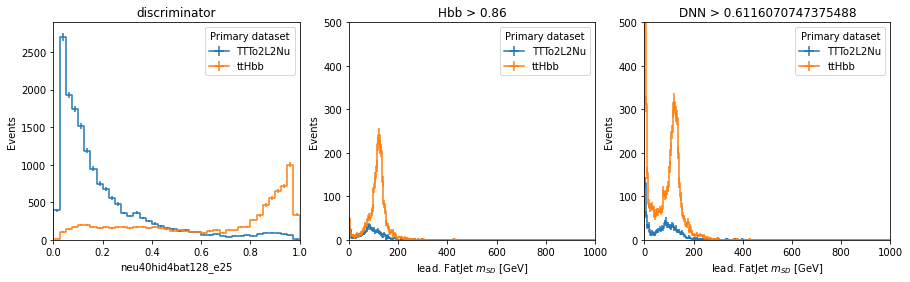

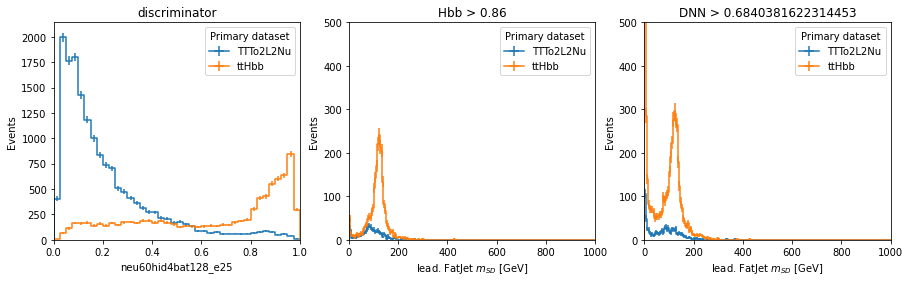

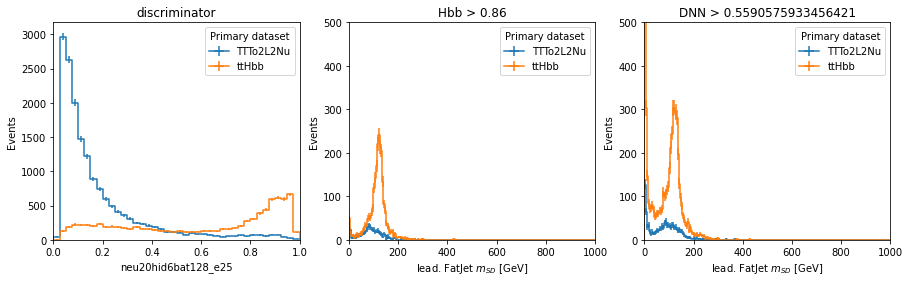

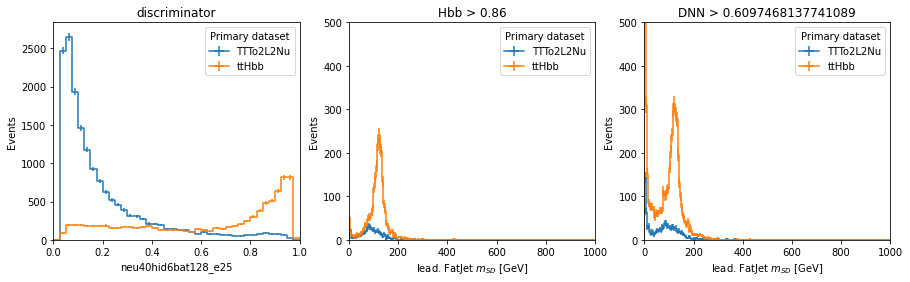

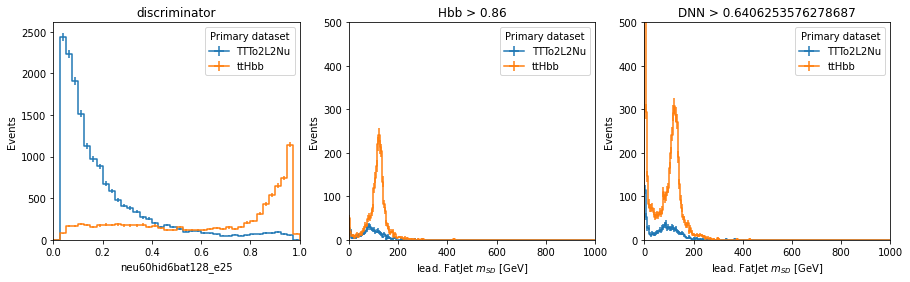

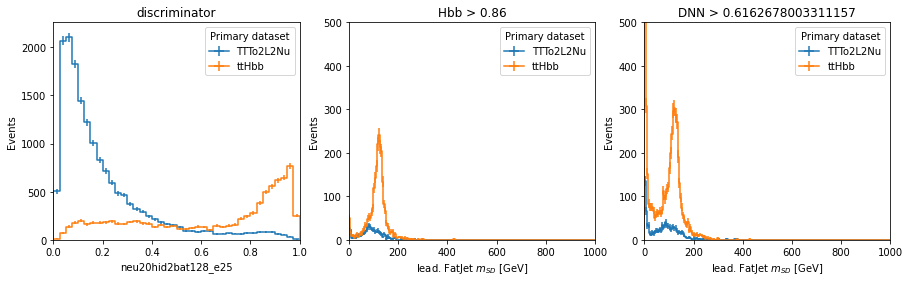

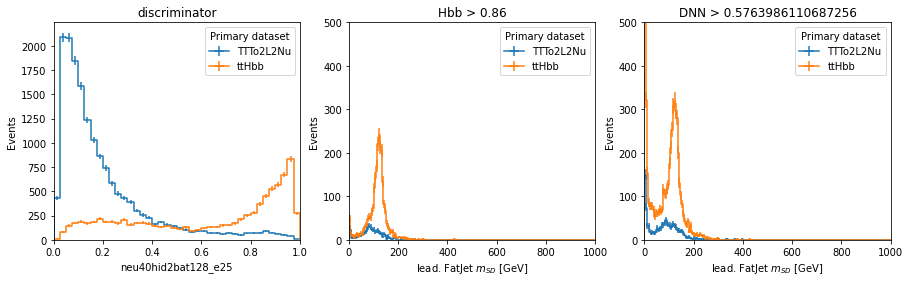

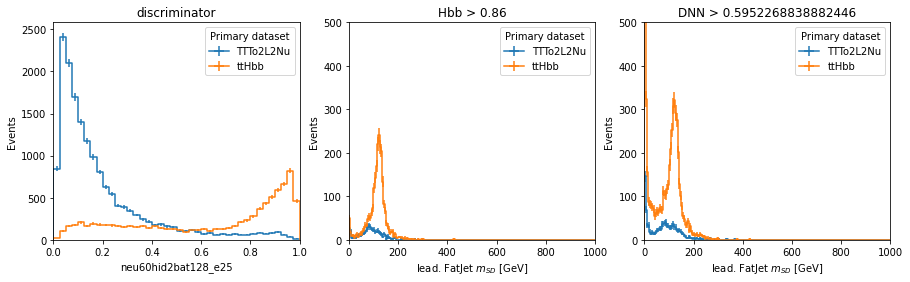

In [15]:
msd = 'leadAK8JetMass'
Hbb = 'leadAK8JetHbb'
dataset_axis = hist.Cat("dataset", "Primary dataset")
msd_axis = hist.Bin(msd, r"lead. FatJet $m_{SD}$ [GeV]", 200, 0, 1000)

#input_file = '/work/mmarcheg/DNN/Evaluation/ttHTobb_ttTo2L2Nu_withAK4/inclusive/DNNTraining_v03_25442_eval.calibrated.h5'
input_file = '/work/mmarcheg/DNN/Evaluation/ttHTobb_ttTo2L2Nu_withAK4_dR/inclusive/DNNTraining_v04_25442_eval.calibrated.h5'
df = pd.read_hdf(input_file)
label = [column for column in df.columns if 'label' in column][0]
scores = [column for column in df.columns if 'e25' in column]
for score in scores:
    tagger_axis    = hist.Bin(score, score, 40, 0, 1)
    tagger_hist    = hist.Hist("Events", dataset_axis, tagger_axis)
    msd_hist_boost = hist.Hist("Events", dataset_axis, msd_axis)
    msd_hist       = hist.Hist("Events", dataset_axis, msd_axis)
    sig = df.query(label + ' > 0.5')
    bkg = df.query(label + ' < 0.5')
    wp = 2*df[score.rstrip('_e25') + '_wp'].values[0]
    #wp = 0.70
    wp_Hbb = 0.86
    sig_boost  = sig.query(Hbb + ' > ' + str(wp_Hbb))
    bkg_boost  = bkg.query(Hbb + ' > ' + str(wp_Hbb))
    sig_in_cut = sig.query(score + ' > ' + str(wp))
    bkg_in_cut = bkg.query(score + ' > ' + str(wp))
    
    fields_sig = {score : sig[score].values}
    fields_bkg = {score : bkg[score].values}
    tagger_hist.fill(dataset='ttHbb', **fields_sig)
    tagger_hist.fill(dataset='TTTo2L2Nu', **fields_bkg)
    
    fields_sig_boost = {msd : sig_boost[msd].values}
    fields_bkg_boost = {msd : bkg_boost[msd].values}
    msd_hist_boost.fill(dataset='ttHbb', **fields_sig_boost)
    msd_hist_boost.fill(dataset='TTTo2L2Nu', **fields_bkg_boost)
    
    fields_sig_in_cut = {msd : sig_in_cut[msd].values}
    fields_bkg_in_cut = {msd : bkg_in_cut[msd].values}
    msd_hist.fill(dataset='ttHbb', **fields_sig_in_cut)
    msd_hist.fill(dataset='TTTo2L2Nu', **fields_bkg_in_cut)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
    plot.plot1d(tagger_hist, ax=ax1, legend_opts={'loc':1})
    ax1.set_title('discriminator')
    plot.plot1d(msd_hist_boost, ax=ax2, legend_opts={'loc':1})
    ax2.set_title('Hbb > ' + str(wp_Hbb))
    ax2.set_ylim(0,500)
    plot.plot1d(msd_hist, ax=ax3, legend_opts={'loc':1})
    ax3.set_title('DNN > ' + str(wp))
    ax3.set_ylim(0,500)    

In [3]:



Hbb = 'leadAK8JetHbb'
Hbb_axis = hist.Bin(Hbb, Hbb, 40, 0, 1)
Hbb_hist = hist.Hist("Events", dataset_axis, Hbb_axis)
Hbb_hist_tagged = hist.Hist("Events", dataset_axis, Hbb_axis)
fields_sig = {Hbb : sig[Hbb].values}
fields_bkg = {Hbb : bkg[Hbb].values}
fields_sig_tagged = {Hbb : sig_tagged[Hbb].values}
fields_bkg_tagged = {Hbb : bkg_tagged[Hbb].values}
Hbb_hist.fill(dataset='ttHbb', **fields_sig)
Hbb_hist.fill(dataset='TTTo2L2Nu', **fields_bkg)
Hbb_hist_tagged.fill(dataset='sig tag', **fields_sig_tagged)
Hbb_hist_tagged.fill(dataset='bkg tag', **fields_bkg_tagged)

<AxesSubplot:xlabel='neu40hid2bat128_e50', ylabel='Events'>

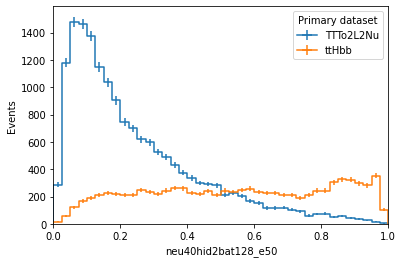

In [4]:
plot.plot1d(tagger_hist, legend_opts={'loc':1})

<AxesSubplot:xlabel='leadAK8JetHbb', ylabel='Events'>

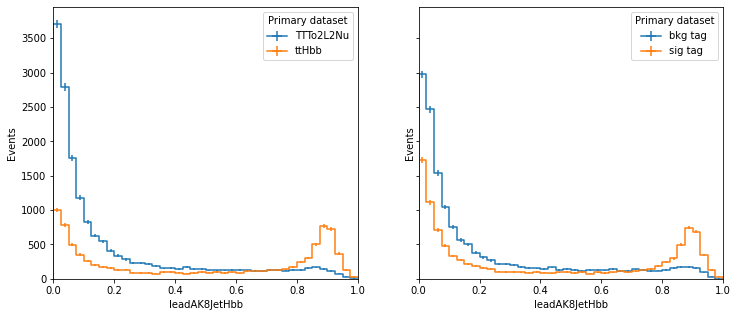

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
plot.plot1d(Hbb_hist, ax=ax1, legend_opts={'loc':1})
plot.plot1d(Hbb_hist_tagged, ax=ax2, legend_opts={'loc':1})

In [6]:
input_file = '/work/mmarcheg/DNN/Evaluation/ttHTobb_ttTo2L2Nu_withHbb_test/DNNTraining_v02_25442_eval.calibrated.h5'
df = pd.read_hdf(input_file)
label = [column for column in df.columns if 'label' in column][0]
score = [column for column in df.columns if 'neu' in column][0]
sig = df.query(label + ' > 0.5')
bkg = df.query(label + ' < 0.5')
#wp = 0.30046332
wp = 0.50
wp_Hbb = 0.86
sig_tagged = df.query(score + ' > ' + str(wp))
bkg_tagged = df.query(score + ' < ' + str(wp))
sig_boost  = sig.query(Hbb + ' > ' + str(wp_Hbb))
bkg_boost  = bkg.query(Hbb + ' > ' + str(wp_Hbb))

In [7]:
dataset_axis = hist.Cat("dataset", "Primary dataset")
tagger_axis = hist.Bin(score, score, 40, 0, 1)
tagger_hist = hist.Hist("Events", dataset_axis, tagger_axis)
fields_sig = {score : sig[score].values}
fields_bkg = {score : bkg[score].values}
tagger_hist.fill(dataset='ttHbb', **fields_sig)
tagger_hist.fill(dataset='TTTo2L2Nu', **fields_bkg)

Hbb = 'leadAK8JetHbb'
msd = 'leadAK8JetMass'
variables = [Hbb, msd]
Hbb_axis = hist.Bin(Hbb, Hbb, 40, 0, 1)
msd_axis = hist.Bin(msd, r"lead. FatJet $m_{SD}$ [GeV]", 200, 0, 1000)
Hbb_hist = hist.Hist("Events", dataset_axis, Hbb_axis)
msd_hist = hist.Hist("Events", dataset_axis, msd_axis)
Hbb_hist_tagged = hist.Hist("Events", dataset_axis, Hbb_axis)
msd_hist_tagged = hist.Hist("Events", dataset_axis, msd_axis)
Hbb_hist_boost  = hist.Hist("Events", dataset_axis, Hbb_axis)
msd_hist_boost  = hist.Hist("Events", dataset_axis, msd_axis)
fields_sig = {Hbb : sig[Hbb].values, msd : sig[msd].values}
fields_bkg = {Hbb : bkg[Hbb].values, msd : bkg[msd].values}
fields_sig_tagged = {Hbb : sig_tagged[Hbb].values, msd: sig_tagged[msd].values}
fields_bkg_tagged = {Hbb : bkg_tagged[Hbb].values, msd: bkg_tagged[msd].values}
fields_sig_boost  = {Hbb : sig_boost[Hbb].values, msd: sig_boost[msd].values}
fields_bkg_boost  = {Hbb : bkg_boost[Hbb].values, msd: bkg_boost[msd].values}
for h in [Hbb_hist, msd_hist]:
    fields = {k: fields_sig[k] for k in h.fields if k in variables}
    h.fill(dataset='ttHbb', **fields)
    fields = {k: fields_bkg[k] for k in h.fields if k in variables}
    h.fill(dataset='TTTo2L2Nu', **fields)
for h in [Hbb_hist_tagged, msd_hist_tagged]:
    fields = {k: fields_sig_tagged[k] for k in h.fields if k in variables}
    h.fill(dataset='sig tag', **fields)
    fields = {k: fields_bkg_tagged[k] for k in h.fields if k in variables}
    h.fill(dataset='bkg tag', **fields)
for h in [Hbb_hist_boost, msd_hist_boost]:
    fields = {k: fields_sig_boost[k] for k in h.fields if k in variables}
    h.fill(dataset='ttHbb', **fields)
    fields = {k: fields_bkg_boost[k] for k in h.fields if k in variables}
    h.fill(dataset='TTTo2L2Nu', **fields)

<AxesSubplot:xlabel='neu40hid2bat128_e50', ylabel='Events'>

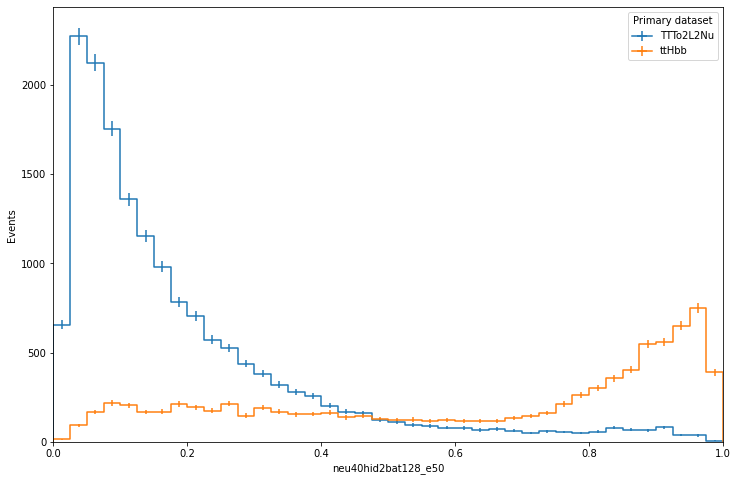

In [8]:
plt.figure(figsize=(12,8))
plot.plot1d(tagger_hist, legend_opts={'loc':1})

<AxesSubplot:xlabel='leadAK8JetHbb', ylabel='Events'>

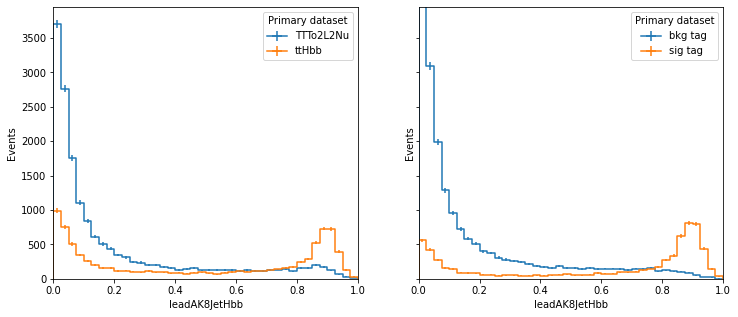

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
plot.plot1d(Hbb_hist, ax=ax1, legend_opts={'loc':1})
plot.plot1d(Hbb_hist_tagged, ax=ax2, legend_opts={'loc':1})

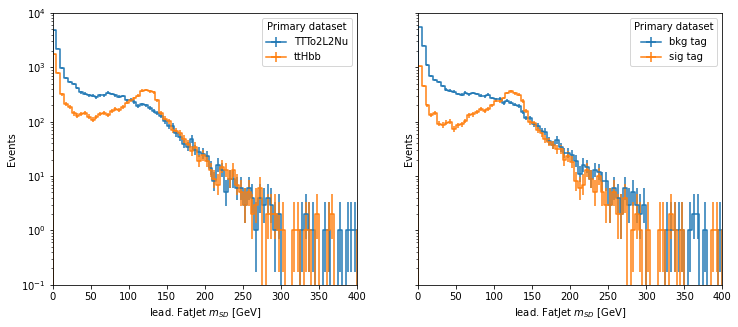

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5),sharex=True, sharey=True)
msd_hist_before_cut = msd_hist
plot.plot1d(msd_hist, ax=ax1, legend_opts={'loc':1})
plot.plot1d(msd_hist_tagged, ax=ax2, legend_opts={'loc':1})
plt.yscale('log')
plt.xlim(0, 400)
plt.ylim(0.1, 10000);

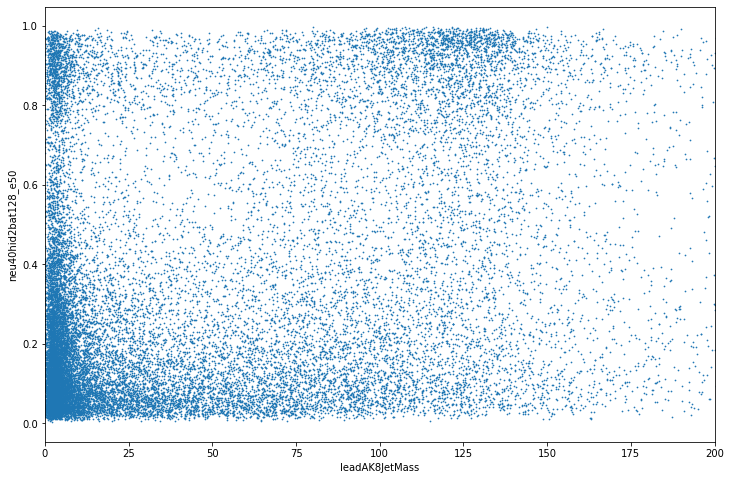

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(df[msd].values, df[score].values, s=0.5)
plt.xlabel(msd)
plt.ylabel(score)
plt.xlim(0,200);

In [12]:
df[[score, 'leadAK8JetMass']].corr()

,neu40hid2bat128_e50,leadAK8JetMass
neu40hid2bat128_e50,1.00000,0.33875
leadAK8JetMass,0.33875,1.00000


In [13]:
# Place a cut at the WP of the DNN discriminator
sig_in_cut = sig.query(score + ' > ' + str(wp))
bkg_in_cut = bkg.query(score + ' > ' + str(wp))

In [14]:
dataset_axis = hist.Cat("dataset", "Primary dataset")
tagger_axis = hist.Bin(score, score, 40, 0, 1)
tagger_hist = hist.Hist("Events", dataset_axis, tagger_axis)
fields_sig = {score : sig_in_cut[score].values}
fields_bkg = {score : bkg_in_cut[score].values}
tagger_hist.fill(dataset='ttHbb', **fields_sig)
tagger_hist.fill(dataset='TTTo2L2Nu', **fields_bkg)

Hbb = 'leadAK8JetHbb'
msd = 'leadAK8JetMass'
variables = [Hbb, msd]
Hbb_axis = hist.Bin(Hbb, Hbb, 40, 0, 1)
msd_axis = hist.Bin(msd, r"lead. FatJet $m_{SD}$ [GeV]", 200, 0, 1000)
Hbb_hist = hist.Hist("Events", dataset_axis, Hbb_axis)
msd_hist = hist.Hist("Events", dataset_axis, msd_axis)
Hbb_hist_tagged = hist.Hist("Events", dataset_axis, Hbb_axis)
msd_hist_tagged = hist.Hist("Events", dataset_axis, msd_axis)
fields_sig = {Hbb : sig_in_cut[Hbb].values, msd : sig_in_cut[msd].values}
fields_bkg = {Hbb : bkg_in_cut[Hbb].values, msd : bkg_in_cut[msd].values}
#fields_sig_tagged = {Hbb : sig_tagged_in_cut[Hbb].values, msd: sig_tagged_in_cut[msd].values}
#fields_bkg_tagged = {Hbb : bkg_tagged_in_cut[Hbb].values, msd: bkg_tagged_in_cut[msd].values}
for h in [Hbb_hist, msd_hist]:
    fields = {k: fields_sig[k] for k in h.fields if k in variables}
    h.fill(dataset='ttHbb', **fields)
    fields = {k: fields_bkg[k] for k in h.fields if k in variables}
    h.fill(dataset='TTTo2L2Nu', **fields)
for h in [Hbb_hist_tagged, msd_hist_tagged]:
    fields = {k: fields_sig_tagged[k] for k in h.fields if k in variables}
    h.fill(dataset='sig tag', **fields)
    fields = {k: fields_bkg_tagged[k] for k in h.fields if k in variables}
    h.fill(dataset='bkg tag', **fields)

<AxesSubplot:xlabel='neu40hid2bat128_e50', ylabel='Events'>

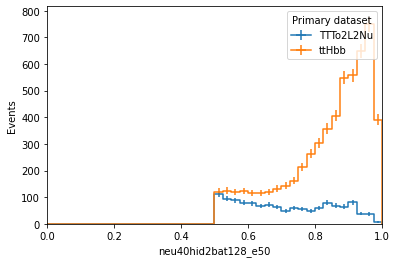

In [15]:
plot.plot1d(tagger_hist, legend_opts={'loc':1})

<AxesSubplot:xlabel='leadAK8JetHbb', ylabel='Events'>

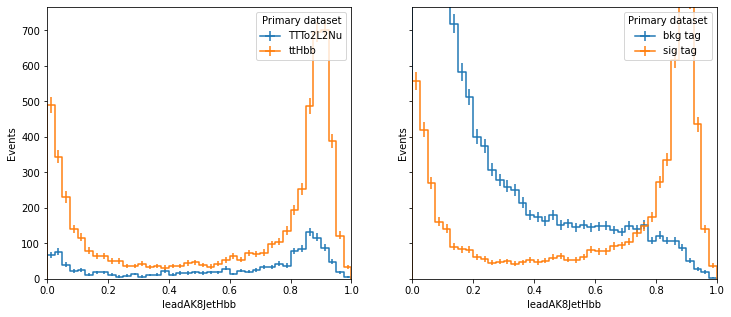

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
plot.plot1d(Hbb_hist, ax=ax1, legend_opts={'loc':1})
plot.plot1d(Hbb_hist_tagged, ax=ax2, legend_opts={'loc':1})

(0.0, 400.0)

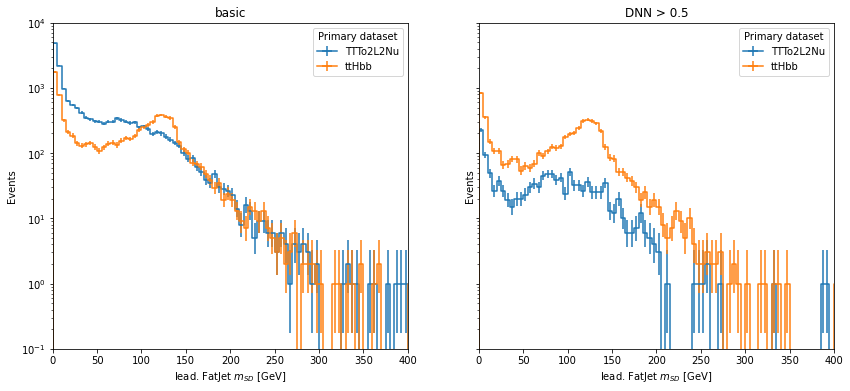

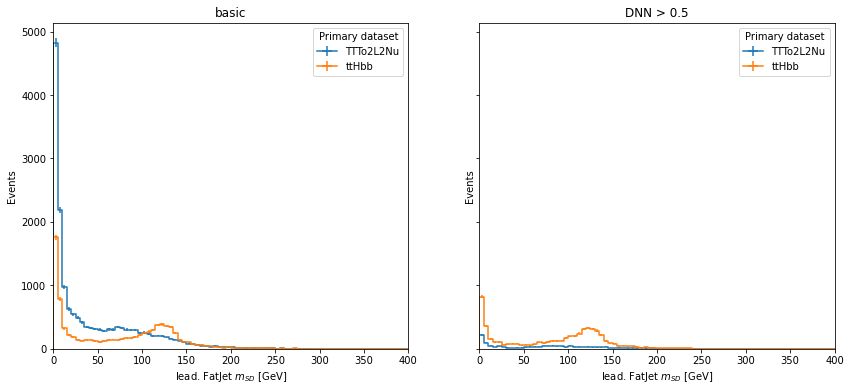

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6),sharex=True, sharey=True)
plot.plot1d(msd_hist_before_cut, ax=ax1, legend_opts={'loc':1})
ax1.set_title("basic")
plot.plot1d(msd_hist, ax=ax2, legend_opts={'loc':1})
ax2.set_title("DNN > " + str(wp))
plt.yscale('log')
plt.xlim(0, 400)
plt.ylim(0.1, 10000);

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6),sharex=True, sharey=True)
plot.plot1d(msd_hist_before_cut, ax=ax1, legend_opts={'loc':1})
ax1.set_title("basic")
plot.plot1d(msd_hist, ax=ax2, legend_opts={'loc':1})
ax2.set_title("DNN > " + str(wp))
#plt.yscale('log')
plt.xlim(0, 400)
#plt.ylim(0.1, 10000);

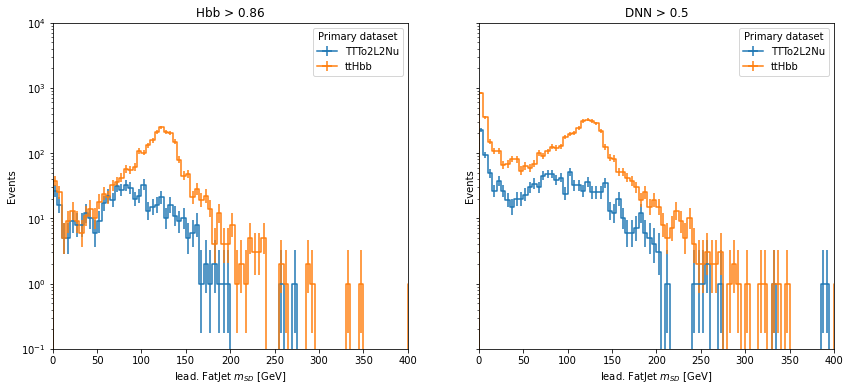

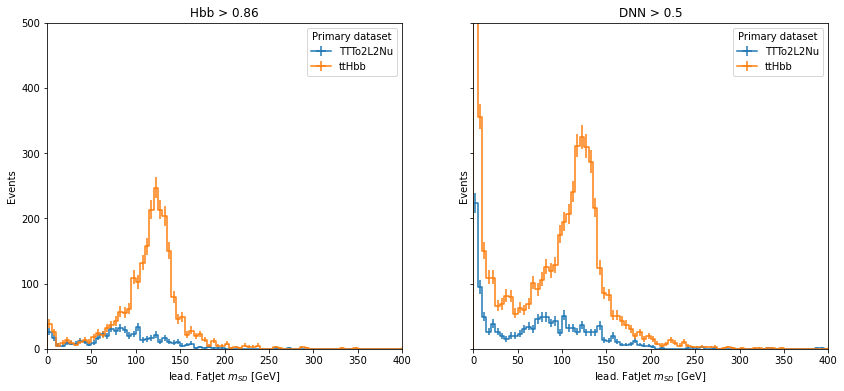

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6),sharex=True, sharey=True)
plot.plot1d(msd_hist_boost, ax=ax1, legend_opts={'loc':1})
ax1.set_title("Hbb > " + str(wp_Hbb))
plot.plot1d(msd_hist, ax=ax2, legend_opts={'loc':1})
ax2.set_title("DNN > " + str(wp))
plt.yscale('log')
plt.xlim(0, 400)
plt.ylim(0.1, 10000);

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6),sharex=True, sharey=True)
plot.plot1d(msd_hist_boost, ax=ax1, legend_opts={'loc':1})
ax1.set_title("Hbb > " + str(wp_Hbb))
plot.plot1d(msd_hist, ax=ax2, legend_opts={'loc':1})
ax2.set_title("DNN > " + str(wp))
#plt.yscale('log')
plt.xlim(0, 400)
plt.ylim(0, 500);